### Stimulus-coding HDDM for Categorization task

This is a script for the drift diffusion model analyses reported in Hu, et al., 2019 (https://psyarxiv.com/9fczh). There were two tasks in the experiment: matching judgment and categorization, and this script used for HDDM analysis of categorization task, using Response-coding

In [1]:
# check the current python version, make sure this is the one that with HDDM correctly installed
import sys
sys.executable

'C:\\Users\\hcp47\\Anaconda3\\envs\\jmatlab\\python.exe'

In [7]:
%matplotlib inline

# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
# plt.rcParams['image.cmap'] = 'viridis'  # change default colormap

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

import warnings

In [3]:
# load data from cateogriztion based on moral valence
dat_M_Categ_val = hddm.load_csv('MS_categ_val_hddm_stim.csv')
# dat_M_Categ_val.head(10)

# load data from cateogriztion based on identity
dat_M_Categ_id = hddm.load_csv('MS_categ_id_hddm_stim.csv')
# dat_M_Categ_id.head(10)

# check the RT distritubtion (un-comment the codes below to view the distributions)
# fig = plt.figure()
#ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
#for i, subj_data in dat_M_Categ_val.groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('plot_MS_Categ_val_flipped.pdf')  # save the plot if necessary
    
#fig = plt.figure()
#ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
#for i, subj_data in dat_M_Categ_id.groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('plot_MS_Categ_id_flipped.pdf')

In [4]:
# parameters for modeling

nsample = 10000    # number of sampling
nburn   = 1000     # number of burn

dateToday = 'final'     # using final instead of real date, for actual date, use: dateToday = str(date.today())

### Valence-based categorization task

#### Model 1: free v, t, z

In [5]:
start_time = time.time()  # the start time of the processing
         
warnings.simplefilter('ignore') # suppress the warnings

#### model 1 for valence based categorization, free v,t,z
dbname = "M_Categ_val_vtz_s_" + dateToday
M_Categ_val_vtz_s = hddm.HDDMStimCoding(dat_M_Categ_val, 
                                        include='z', 
                                        stim_col='stim', 
                                        depends_on = {'v':['val','id'], 't':['val','id']},
                                        split_param='v', 
                                        drift_criterion=False)


M_Categ_val_vtz_s.find_starting_values()
M_Categ_val_vtz_s.sample(nsample, burn=nburn, dbname=dbname + '.db', db='pickle')
   
# save the model
M_Categ_val_vtz_s.save(dbname)

# loading the existing model (if you have run the modeling).
#M_Categ_val_vtz = hddm.load(dbname)

m1_time = time.time() # the start time of the processing
print("Running M1 used: %f " % (m1_time - start_time))

# DIC
print("M_Categ_val_vtz_s DIC: %f" % M_Categ_val_vtz_s.dic)  # -13856.303146

 [-----------------100%-----------------] 10000 of 10000 complete in 2771.0 secRunning M1 used: 2792.631302 
M_Categ_val_vtz_s DIC: -13856.303146


Plotting a
Plotting a_std
Plotting v(Other.Bad)
Plotting v(Other.Good)
Plotting v(Self.Bad)
Plotting v(Self.Good)
Plotting v_std
Plotting t(Other.Bad)
Plotting t(Other.Good)
Plotting t(Self.Bad)
Plotting t(Self.Good)
Plotting t_std
Plotting z
Plotting z_std


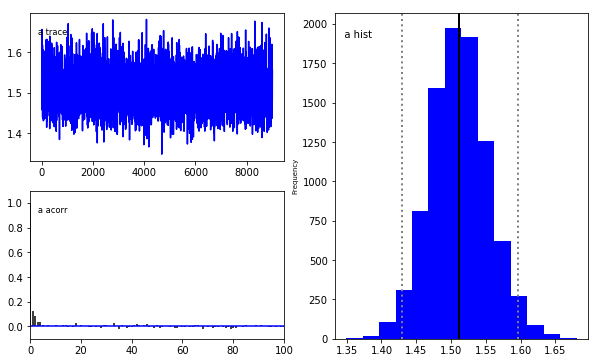

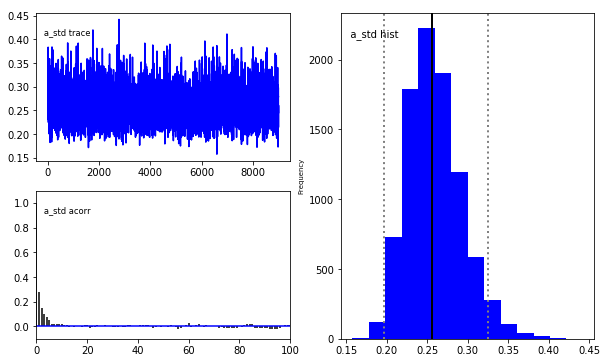

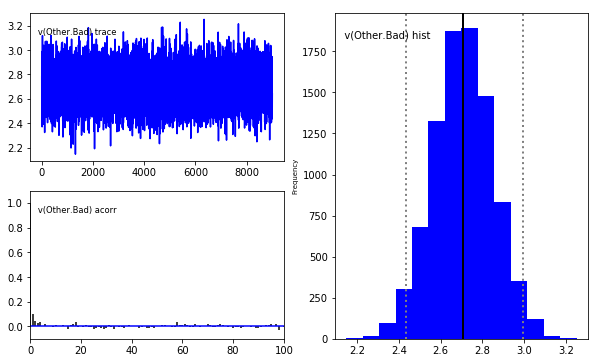

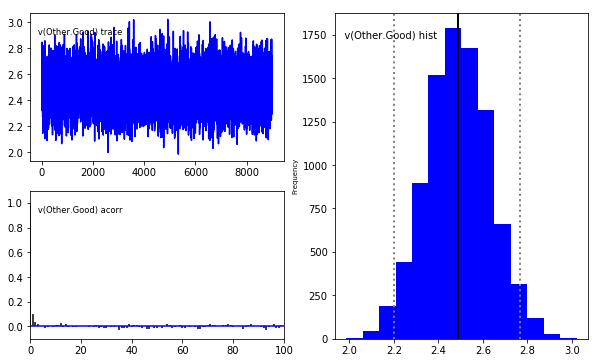

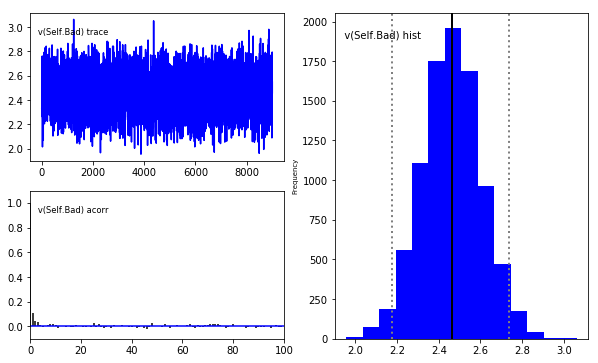

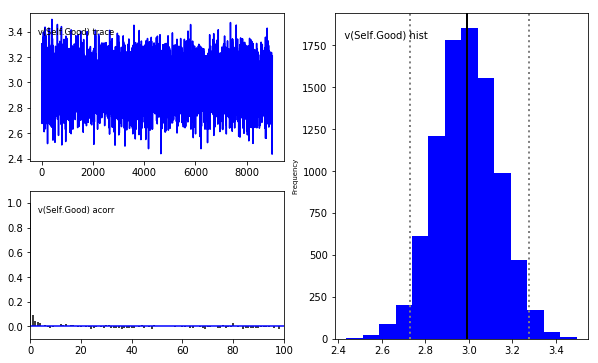

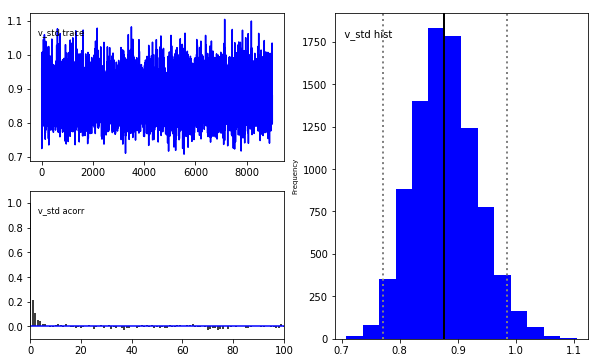

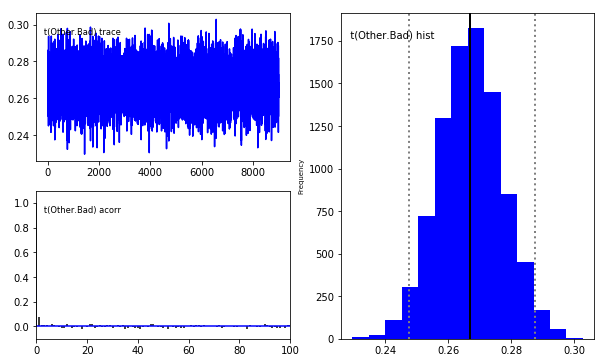

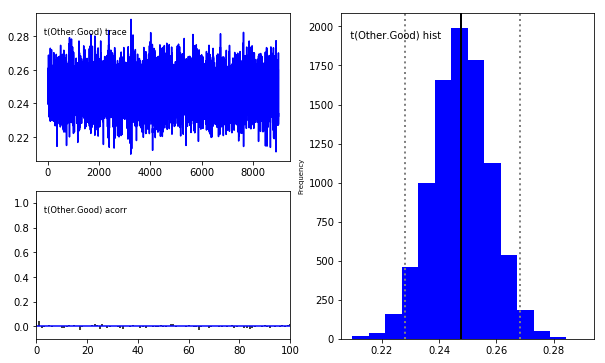

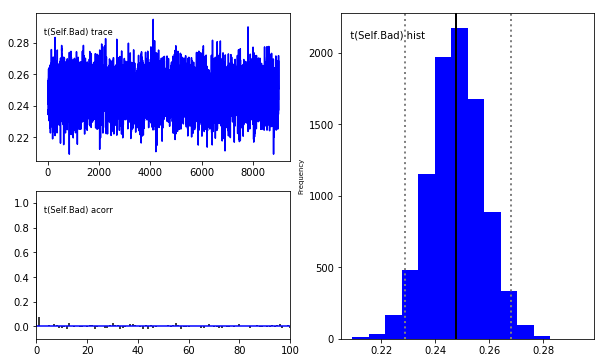

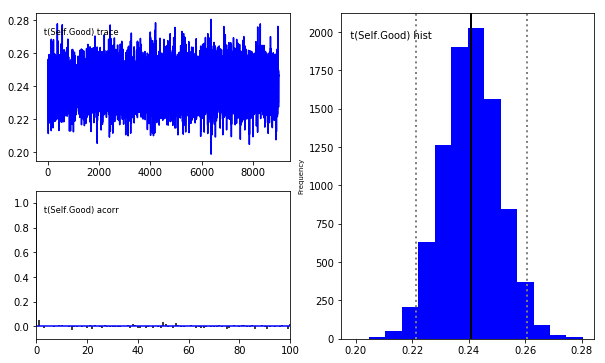

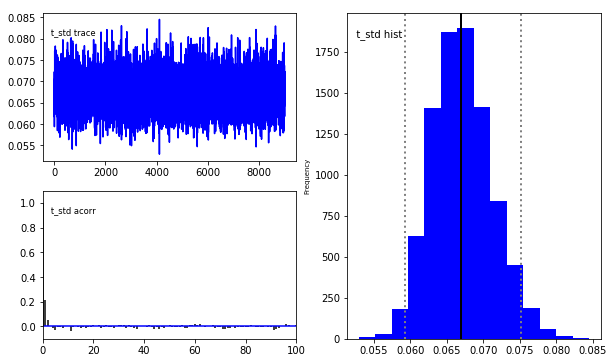

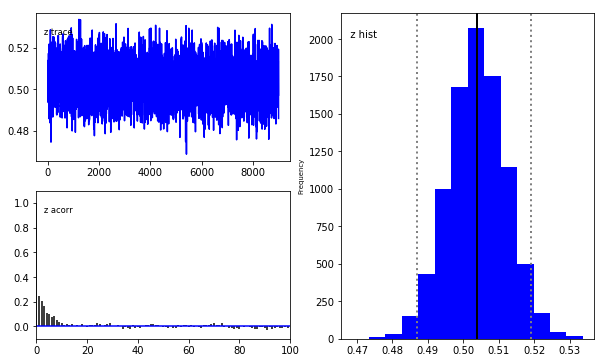

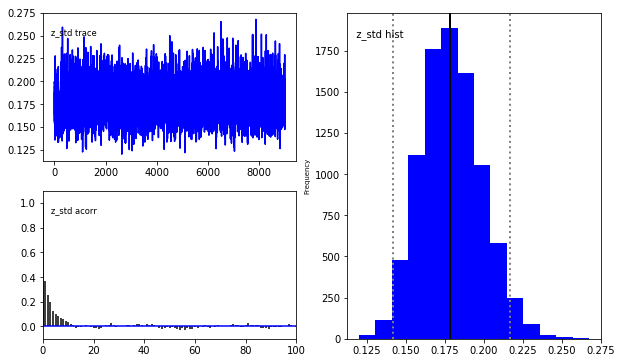

In [6]:
M_Categ_val_vtz_s.plot_posteriors() # check convergence by visual inspection

In [7]:
## ppc
ppc_data_val_vtz_s = hddm.utils.post_pred_gen(M_Categ_val_vtz_s)
ppc_compare_val_vtz_s = hddm.utils.post_pred_stats(dat_M_Categ_val, ppc_data_val_vtz_s)  # MSE 0.031996
ppc_compare_val_vtz_s.to_csv('ppc_compare_val_vtz_s.csv', sep = ',')
#M_Categ_val_vtz_s.plot_posterior_predictive()

# M_match_vatz.plot_posterior_quantiles()
# M_match_vatz.plot_posteriors_conditions()
# M_match_vatz_data =  M_match_vatz.gen_stats

 [-----------------101%-----------------] 167 of 164 complete in 2311.0 sec

#### Model 2: free v, z

In [8]:
dbname = "M_Categ_val_vz_s_" + dateToday
M_Categ_val_vz_s = hddm.HDDMStimCoding(dat_M_Categ_val, 
                                       include='z', 
                                       stim_col='stim', 
                                       depends_on = {'v':['val','id']},
                                       split_param='v', 
                                       drift_criterion=False)

M_Categ_val_vz_s.find_starting_values()
M_Categ_val_vz_s.sample(nsample, burn=nburn, dbname=dbname+'.db', db='pickle')
M_Categ_val_vz_s.save(dbname)

## DIC
print("M_Categ_val_vz DIC: %f" % M_Categ_val_vz_s.dic) # -12507.083965

 [-----------------100%-----------------] 10000 of 10000 complete in 2444.6 secM_Categ_val_vz DIC: -12507.083965


Plotting a
Plotting a_std
Plotting v(Other.Bad)
Plotting v(Other.Good)
Plotting v(Self.Bad)
Plotting v(Self.Good)
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


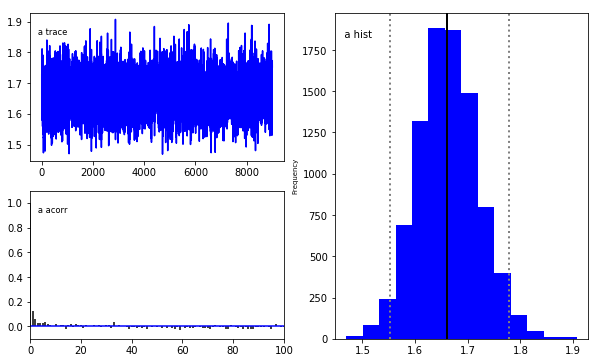

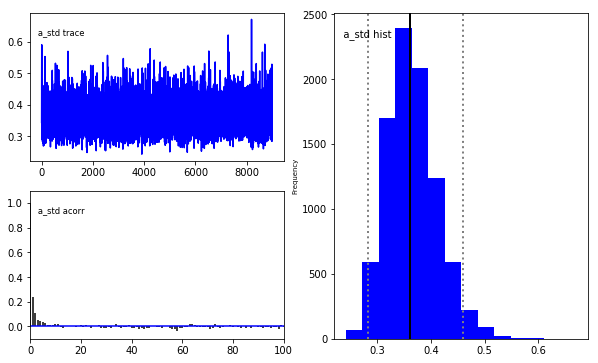

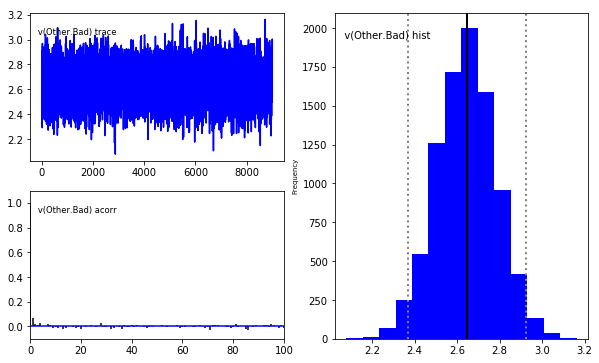

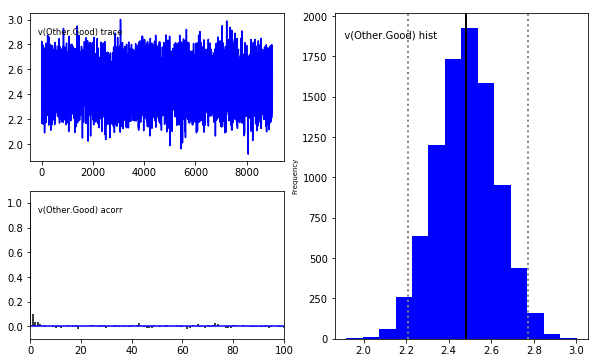

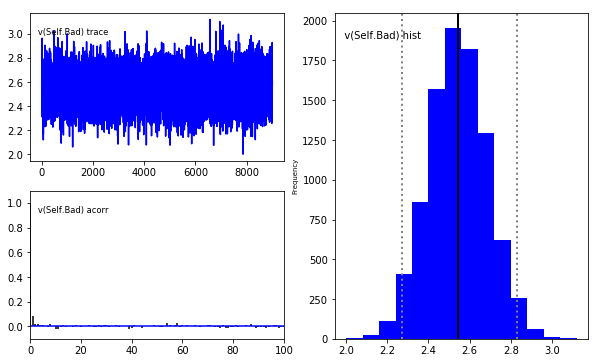

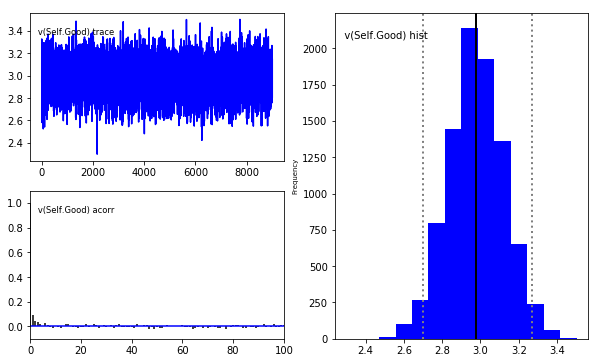

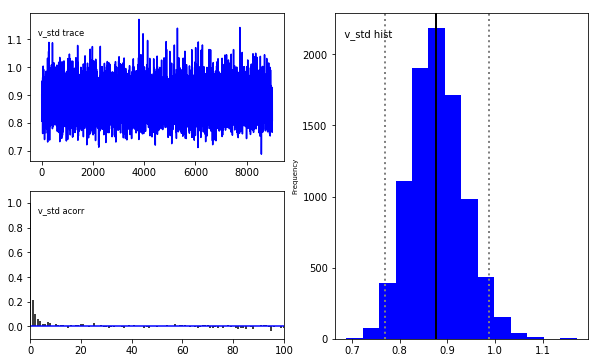

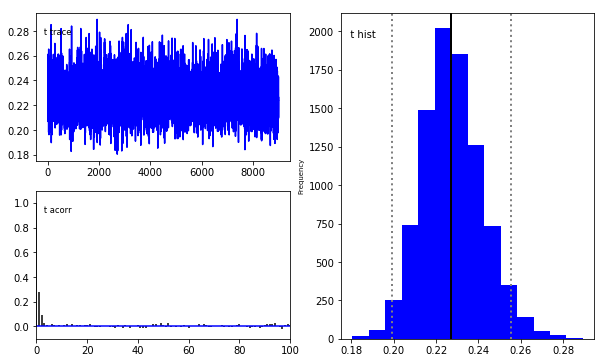

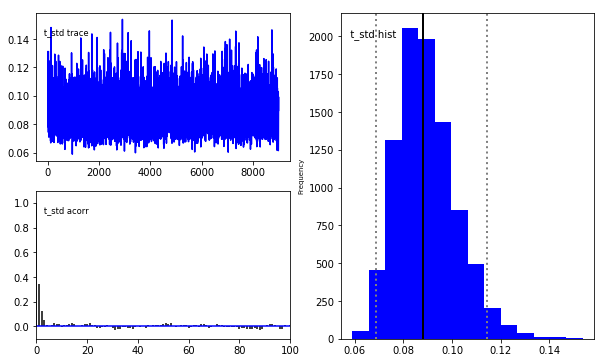

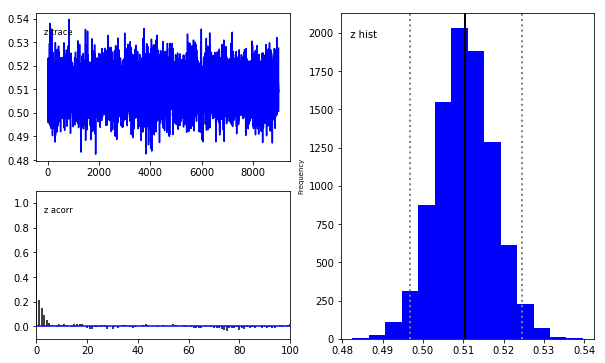

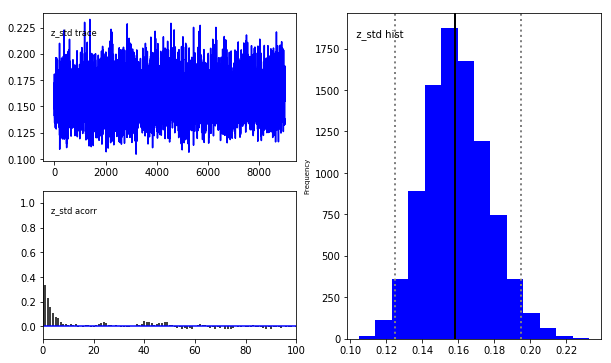

In [9]:
M_Categ_val_vz_s.plot_posteriors() # check convergence by visual inspection

In [10]:
## ppc of model 2
ppc_data_Categ_val_vz_s = hddm.utils.post_pred_gen(M_Categ_val_vz_s)
ppc_compare_Categ_val_vz_s = hddm.utils.post_pred_stats(dat_M_Categ_val, ppc_data_Categ_val_vz_s)  # MSE 
ppc_compare_Categ_val_vz_s.to_csv('ppc_compare_Categ_val_vz_s.csv', sep = ',')

#M_Categ_vt.plot_posterior_predictive()
# M_Categ_vt.plot_posterior_quantiles()

 [-----------------101%-----------------] 167 of 164 complete in 2353.8 sec

### Identity-based categorization

#### Model 1: free v, t, z

In [11]:
warnings.simplefilter('ignore')

start_time = time.time()  # the start time of the processing

dbname = "M_Categ_id_vtz_s_" + dateToday 
M_Categ_id_vtz_s = hddm.HDDMStimCoding(dat_M_Categ_id, 
                                       include='z', 
                                       stim_col='stim',
                                       depends_on = {'v':['val','id'], 't':['val','id']},
                                       split_param='v', 
                                       drift_criterion=False) # p_outlier=0.05 

M_Categ_id_vtz_s.find_starting_values()
M_Categ_id_vtz_s.sample(nsample, burn=nburn, dbname=dbname+'.db', db='pickle')

# save the model
M_Categ_id_vtz_s.save(dbname)
# M_Categ_id_vtz_s= hddm.load(dbname)

# DIC
print("M_Categ_id_vtz_s DIC: %f" % M_Categ_id_vtz_s.dic)  # -13753.757816

m1_time = time.time() # the start time of the processing
print("Running M1 used: %f " % (m1_time - start_time))

 [-----------------100%-----------------] 10000 of 10000 complete in 2935.8 secM_Categ_id_vtz_s DIC: -13753.757816
Running M1 used: 2959.244111 


Plotting a
Plotting a_std
Plotting v(Other.Bad)
Plotting v(Other.Good)
Plotting v(Self.Bad)
Plotting v(Self.Good)
Plotting v_std
Plotting t(Other.Bad)
Plotting t(Other.Good)
Plotting t(Self.Bad)
Plotting t(Self.Good)
Plotting t_std
Plotting z
Plotting z_std


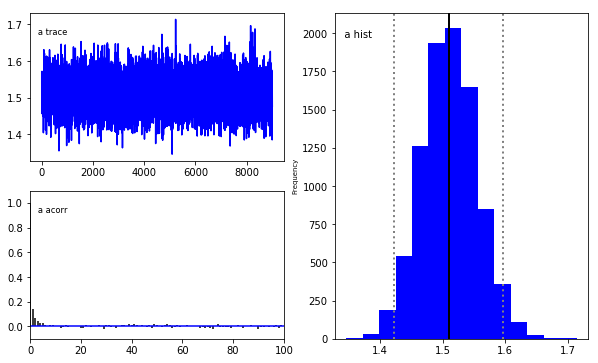

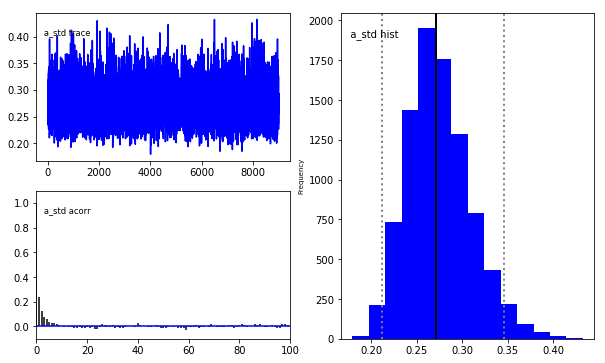

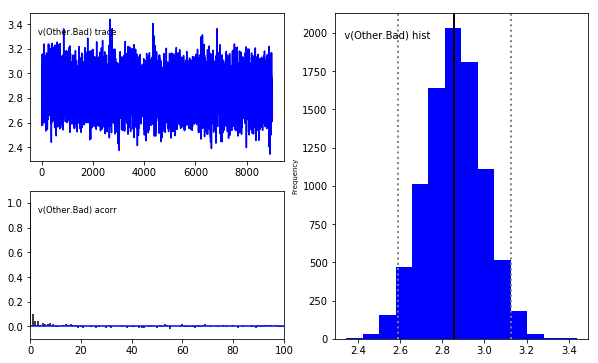

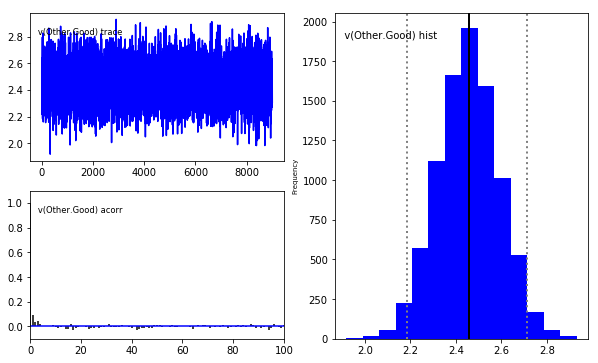

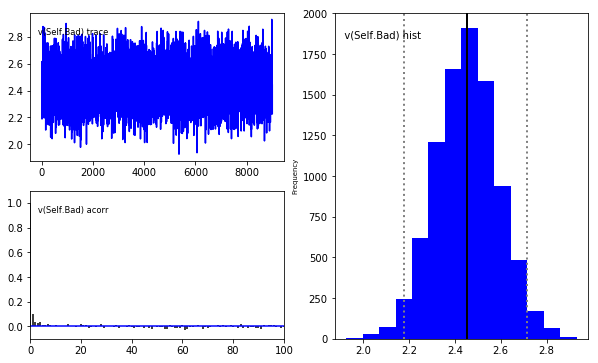

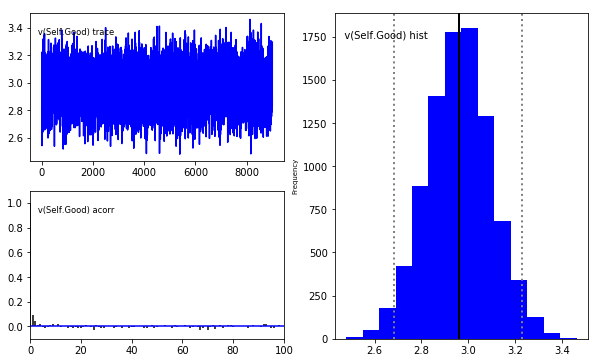

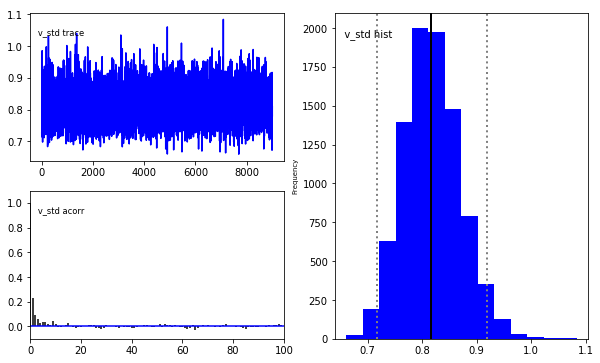

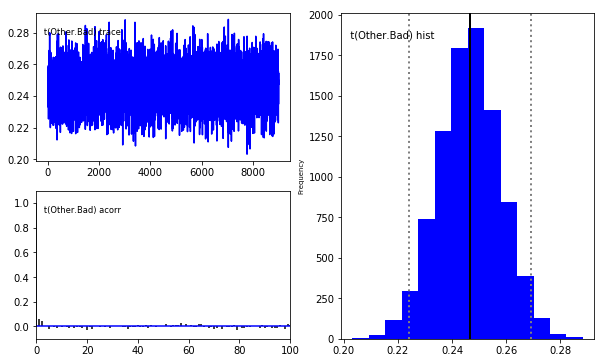

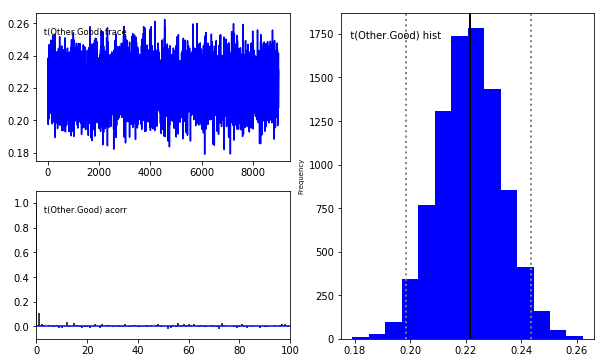

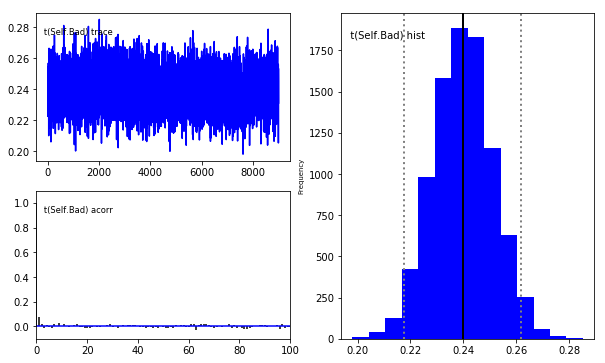

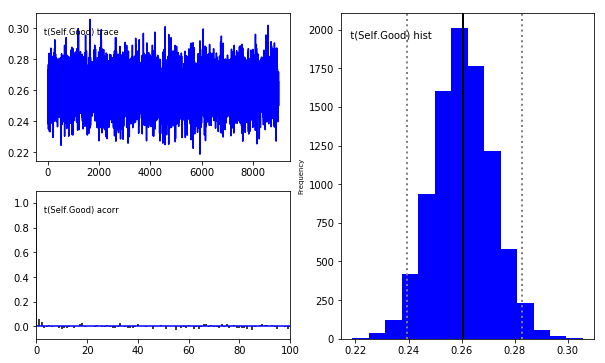

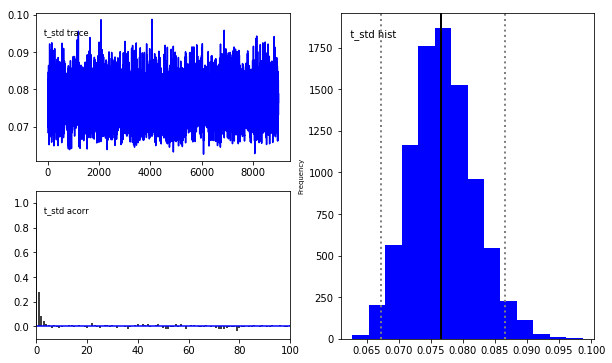

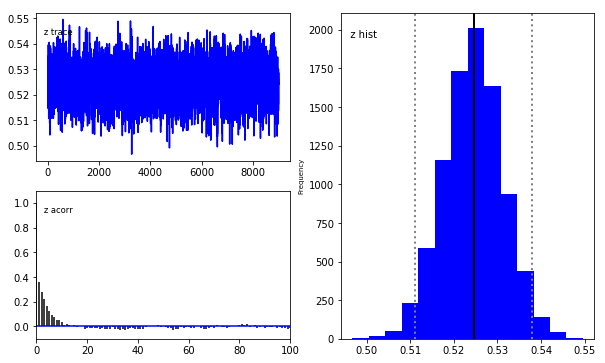

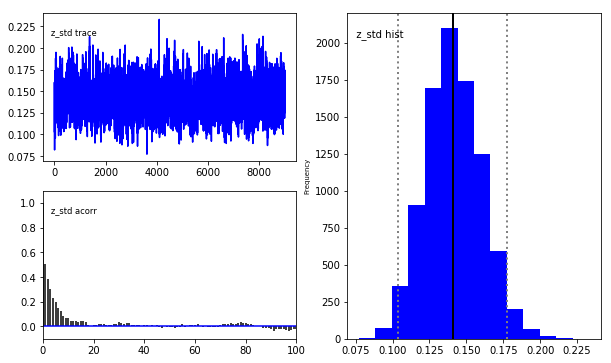

In [12]:
M_Categ_id_vtz_s.plot_posteriors() # check convergence by visual inspection

In [13]:
## ppc
ppc_data_id_vtz_s    = hddm.utils.post_pred_gen(M_Categ_id_vtz_s)
ppc_compare_id_vtz_s = hddm.utils.post_pred_stats(dat_M_Categ_id, ppc_data_id_vtz_s)  # MSE 0.031996
ppc_compare_id_vtz_s.to_csv('ppc_compare_id_vtz_s.csv', sep = ',')
#M_Categ_id_vtz_s.plot_posterior_predictive()

# M_match_vatz.plot_posterior_quantiles()
# M_match_vatz.plot_posteriors_conditions()
# M_match_vatz_data =  M_match_vatz.gen_stats

 [-----------------101%-----------------] 167 of 164 complete in 2375.3 sec

#### Model 2: free v, z

In [10]:
warnings.simplefilter('ignore')

dbname = "M_Categ_id_vz_s_" + dateToday
M_Categ_id_vz_s = hddm.HDDMStimCoding(dat_M_Categ_id,
                                      include='z', 
                                      stim_col='stim',
                                      depends_on = {'v':['val','id']},
                                      split_param='v', 
                                      drift_criterion=False,
                                      p_outlier=0.05)
M_Categ_id_vz_s.find_starting_values()
M_Categ_id_vz_s.sample(nsample, burn=nburn, dbname=dbname +'.db', db='pickle')
M_Categ_id_vz_s.save(dbname)

# DIC
print("M_Categ_id_vz_s DIC: %f" % M_Categ_id_vz_s.dic)  # 

 [-----------------100%-----------------] 10001 of 10000 complete in 2923.8 secM_Categ_id_vz_s DIC: -13971.730418


Plotting a
Plotting a_std
Plotting v(Other.Bad)
Plotting v(Other.Good)
Plotting v(Self.Bad)
Plotting v(Self.Good)
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting dc
Plotting dc_std


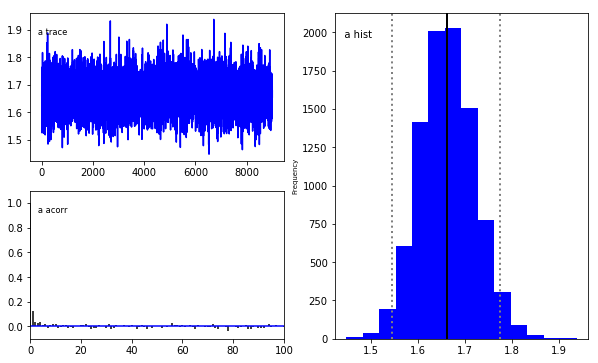

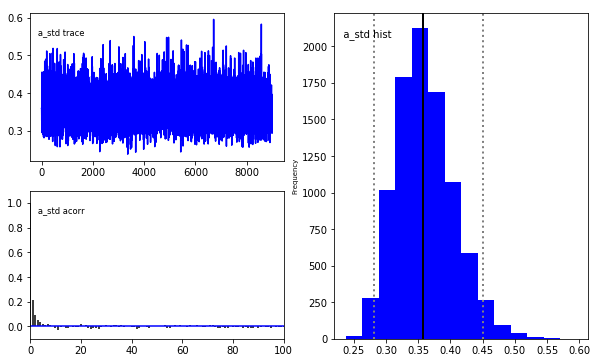

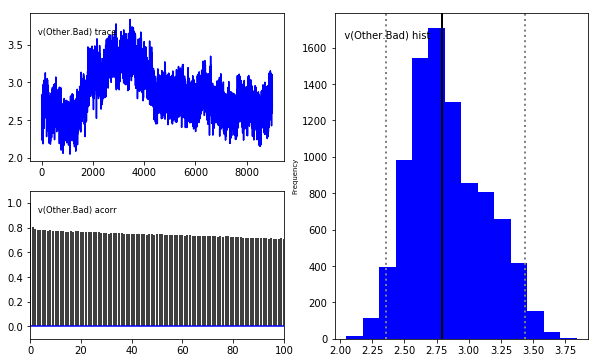

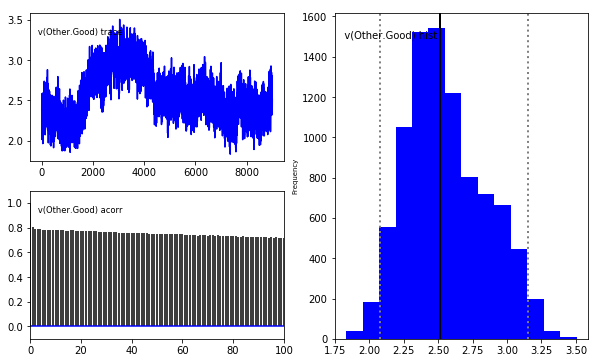

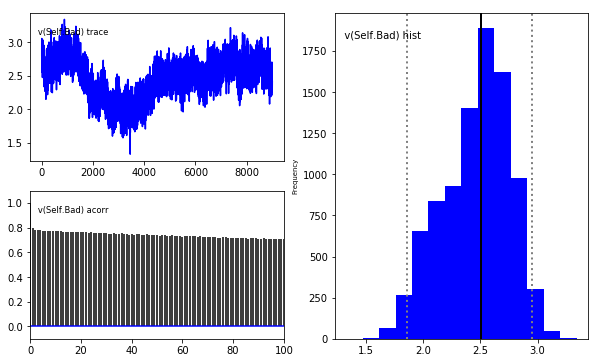

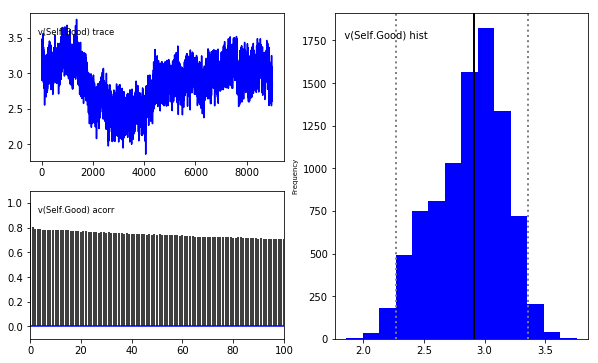

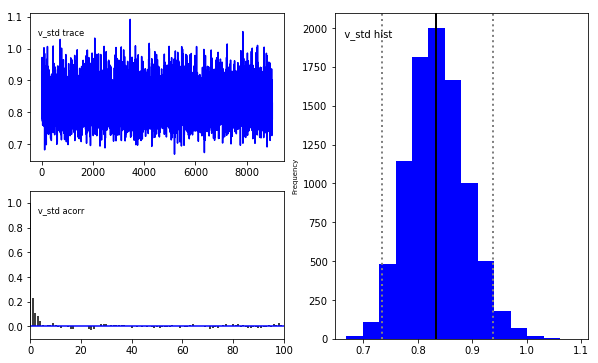

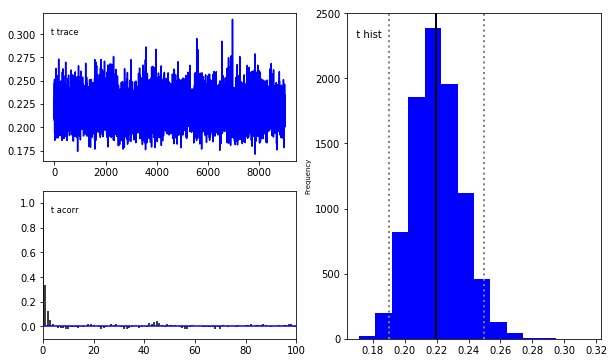

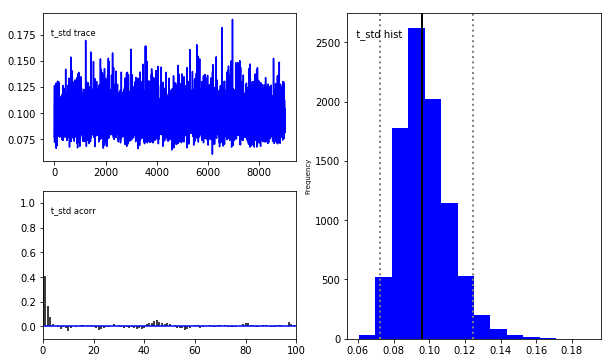

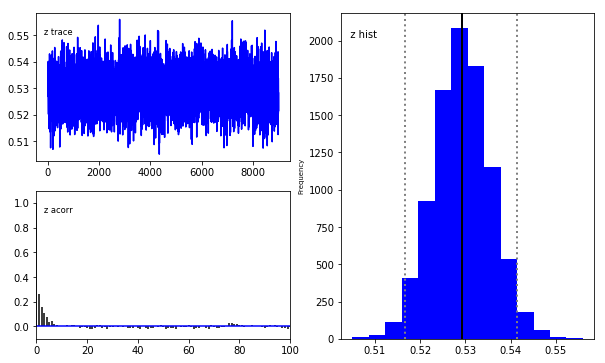

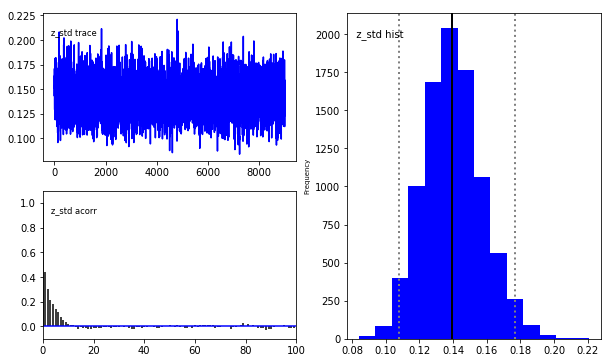

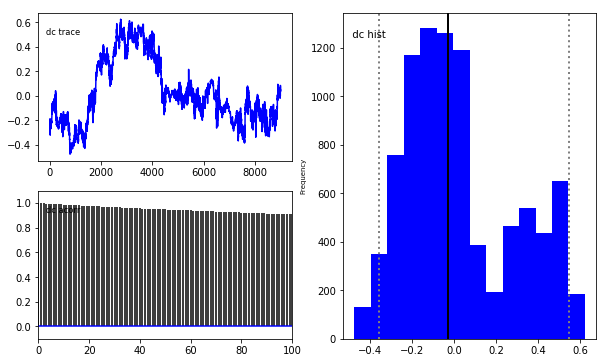

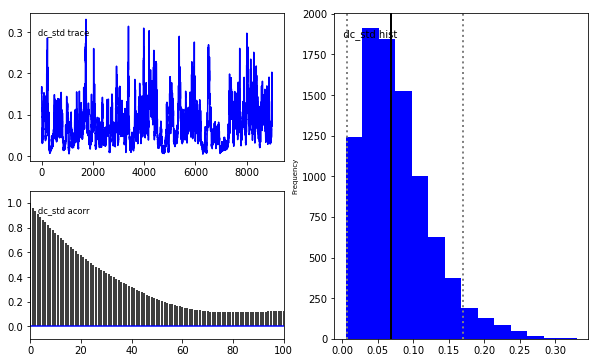

In [15]:
M_Categ_id_vz_s.plot_posteriors() # check convergence by visual inspection

In [16]:
## ppc of model 2
ppc_data_Categ_id_vz_s = hddm.utils.post_pred_gen(M_Categ_id_vz_s)
ppc_compare_Categ_id_vz_s = hddm.utils.post_pred_stats(dat_M_Categ_id, ppc_data_Categ_id_vz_s)  # MSE 
ppc_compare_Categ_id_vz_s.to_csv('ppc_compare_Categ_id_vz_s.csv', sep = ',')

 [-----------------101%-----------------] 167 of 164 complete in 2503.9 sec

### Check the results

#### Get, plot, and compare the postieriors of Valence-based task

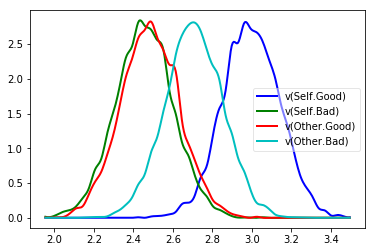

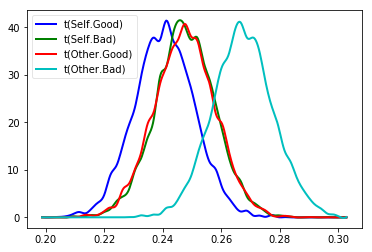

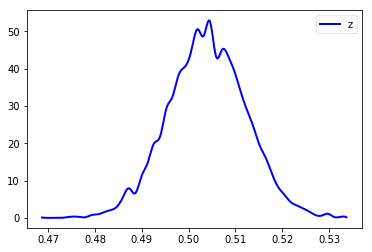

In [17]:
v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val = M_Categ_val_vtz_s.nodes_db.node[['v(Self.Good)','v(Self.Bad)','v(Other.Good)','v(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val])
plt.savefig('ex7_T_vzt_val_v_s.pdf')

t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val = M_Categ_val_vtz_s.nodes_db.node[['t(Self.Good)','t(Self.Bad)','t(Other.Good)','t(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val])
plt.savefig('ex7_T_vzt_val_t_s.pdf')

## starting point
z_val = M_Categ_val_vtz_s.nodes_db.node['z']
hddm.analyze.plot_posterior_nodes([z_val])
plt.savefig('ex7_rep_categ_vtz_z_val_plot.pdf')

In [18]:
# using absolute value for "bad" conditions 
print('For Val-based task:')
print("P(v_M_GoodSelf  > v_M_BadSelf)   = ", (v_GoodSelf_val.trace()  > v_BadSelf_val.trace()).mean())      # 0.998
print("P(v_M_GoodOther > v_M_BadOther)  = ", (v_GoodOther_val.trace() > v_BadOther_val.trace()).mean())     # 0.1292
print("P(v_M_GoodSelf  > v_M_GoodOther) = ", (v_GoodSelf_val.trace()  > v_GoodOther_val.trace()).mean())    # 0.992
print("P(v_M_BadSelf   > v_M_BadOther)  = ", (v_BadSelf_val.trace()   > v_BadOther_val.trace()).mean())     # 0.0

print("P(t_M_GoodSelf  > t_M_BadSelf)   = ", (t_GoodSelf_val.trace()  > t_BadSelf_val.trace()).mean())      # 0.998
print("P(t_M_GoodOther > t_M_BadOther)  = ", (t_GoodOther_val.trace() > t_BadOther_val.trace()).mean())     # 0.1292
print("P(t_M_GoodSelf  > t_M_GoodOther) = ", (t_GoodSelf_val.trace()  > t_GoodOther_val.trace()).mean())    # 0.992
print("P(t_M_BadSelf   > t_M_BadOther)  = ", (t_BadSelf_val.trace()   > t_BadOther_val.trace()).mean())     # 0.0


print("P(z > 0.05) = ", (z_val.trace() > 0.5).mean()) #

For Val-based task:
P(v_M_GoodSelf  > v_M_BadSelf)   =  0.994777777778
P(v_M_GoodOther > v_M_BadOther)  =  0.139888888889
P(v_M_GoodSelf  > v_M_GoodOther) =  0.994111111111
P(v_M_BadSelf   > v_M_BadOther)  =  0.111444444444
P(t_M_GoodSelf  > t_M_BadSelf)   =  0.304666666667
P(t_M_GoodOther > t_M_BadOther)  =  0.0817777777778
P(t_M_GoodSelf  > t_M_GoodOther) =  0.308777777778
P(t_M_BadSelf   > t_M_BadOther)  =  0.0813333333333
P(z > 0.05) =  0.687


#### Get, plot, and compare the postieriors of Identity-based task

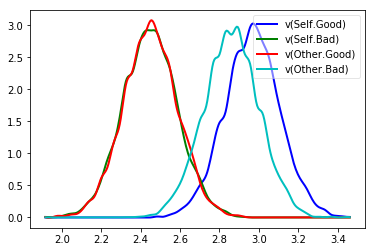

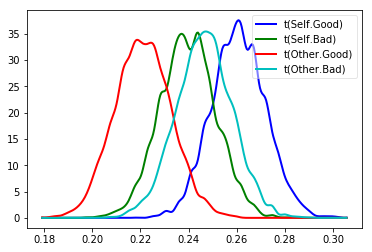

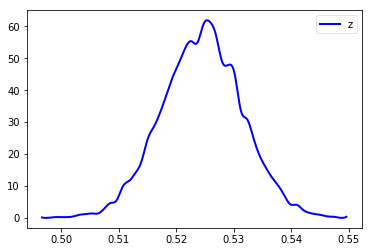

In [19]:
v_GoodSelf_id,v_BadSelf_id, v_GoodOther_id, v_BadOther_id = M_Categ_id_vtz_s.nodes_db.node[['v(Self.Good)','v(Self.Bad)','v(Other.Good)','v(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([v_GoodSelf_id,v_BadSelf_id, v_GoodOther_id, v_BadOther_id])
plt.savefig('ex7_T_vzt_id_v_s.pdf')

t_GoodSelf_id,t_BadSelf_id, t_GoodOther_id, t_BadOther_id = M_Categ_id_vtz_s.nodes_db.node[['t(Self.Good)','t(Self.Bad)','t(Other.Good)','t(Other.Bad)']] 
hddm.analyze.plot_posterior_nodes([t_GoodSelf_id,t_BadSelf_id, t_GoodOther_id, t_BadOther_id]) 
plt.savefig('exp7_T_vzt_id_t_s.pdf') 

## starting point
z_id = M_Categ_id_vtz_s.nodes_db.node['z']
hddm.analyze.plot_posterior_nodes([z_id])
plt.savefig('ex7_rep_categ_vtz_z_id_plot.pdf')

In [20]:
# using absolute value for "other" conditions 
print('For Id-based task:')
print("P(v_I_GoodSelf  > v_I_BadSelf)   = ", (v_GoodSelf_id.trace()  > v_BadSelf_id.trace()).mean())      # 0.999
print("P(v_I_GoodOther > v_I_BadOther)  = ", (v_GoodOther_id.trace() > v_BadOther_id.trace()).mean())     # 0
print("P(v_I_GoodSelf  > v_I_GoodOther) = ", (v_GoodSelf_id.trace()  > v_GoodOther_id.trace()).mean())    # 0.999
print("P(v_I_BadSelf   > v_I_BadOther)  = ", (v_BadSelf_id.trace()   > v_BadOther_id.trace()).mean())     # 0.002

print("P(t_I_GoodSelf  > t_I_BadSelf)   = ", (t_GoodSelf_id.trace()  > t_BadSelf_id.trace()).mean())      # 0.998
print("P(t_I_GoodOther > t_I_BadOther)  = ", (t_GoodOther_id.trace() > t_BadOther_id.trace()).mean())     # 0.1292
print("P(t_I_GoodSelf  > t_I_GoodOther) = ", (t_GoodSelf_id.trace()  > t_GoodOther_id.trace()).mean())    # 0.992
print("P(t_I_BadSelf   > t_I_BadOther)  = ", (t_BadSelf_id.trace()   > t_BadOther_id.trace()).mean())     # 0.0


print("P(z > 0.05) = ", (z_id.trace() > 0.5).mean())  #

For Id-based task:
P(v_I_GoodSelf  > v_I_BadSelf)   =  0.995888888889
P(v_I_GoodOther > v_I_BadOther)  =  0.0167777777778
P(v_I_GoodSelf  > v_I_GoodOther) =  0.995333333333
P(v_I_BadSelf   > v_I_BadOther)  =  0.0164444444444
P(t_I_GoodSelf  > t_I_BadSelf)   =  0.910444444444
P(t_I_GoodOther > t_I_BadOther)  =  0.0578888888889
P(t_I_GoodSelf  > t_I_GoodOther) =  0.994666666667
P(t_I_BadSelf   > t_I_BadOther)  =  0.337333333333
P(z > 0.05) =  0.999666666667


### Check the convergence (Gelman-Rubin statistic)

#### valence-based task

In [ ]:
models_categ_val = []
for i in range(4):
    print('processing Model ', i, '\n')
    m_stim = hddm.HDDMStimCoding(dat_M_Categ_val, 
                                 include='z', 
                                 stim_col='stim', 
                                 depends_on={'v':['val','id'], 't':['val','id']},
                                 split_param='v',drift_criterion=False)
    
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn=nburn)
    models_categ_val.append(m_stim)

Categ_val_R_hat_vtz = hddm.analyze.gelman_rubin(models_categ_val)

# save Categ_R_hat_vtz
with open('Categ_val_R_hat_vtz_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Categ_val_R_hat_vtz.items())
    

processing Model  0 

 [---------------- 42%                  ] 4262 of 10000 complete in 1311.3 sec

#### Identity-based task

In [ ]:
models_categ_id = []
for i in range(4):
    print('processing Model ', i, '\n')
    m_stim = hddm.HDDMStimCoding(dat_M_Categ_id,
                                 include='z', 
                                 stim_col='stim',
                                 depends_on = {'v':['val','id'], 't':['val','id']},
                                 split_param='v', 
                                 drift_criterion=False)
    
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn=nburn)
    models_categ_id.append(m_stim)

Categ_id_R_hat_vtz = hddm.analyze.gelman_rubin(models_categ_id)

# save Categ_R_hat_vtz
with open('Categ_id_R_hat_vtz_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Categ_id_R_hat_vtz.items())